In [1]:
%load_ext autoreload
%autoreload 2

import os


from scmeval.plot.measure_bias_plot import plot_measures_matrices
from scmeval.confounders import randomize_metric, generate_architecture_data, generate_mean_score_data
from scmeval.evaluation.reader import read_gold_scores, read_measure_cnn_dm_shuffle_results
from scmeval.plot.length_plot import plot_measure_length_sensitivty, plot_measure_summeval_length_sensitivty

from scmeval.plot.intra_summarizer_correlation_plot import plot_intra_system_correlation_for_measures


os.chdir(os.path.expanduser("~/projects/coherence_measure_evaluation"))

Warning, no column specificed and more than one column in dataset. Using first column.
Warning, no column specificed and more than one column in dataset. Using first column.


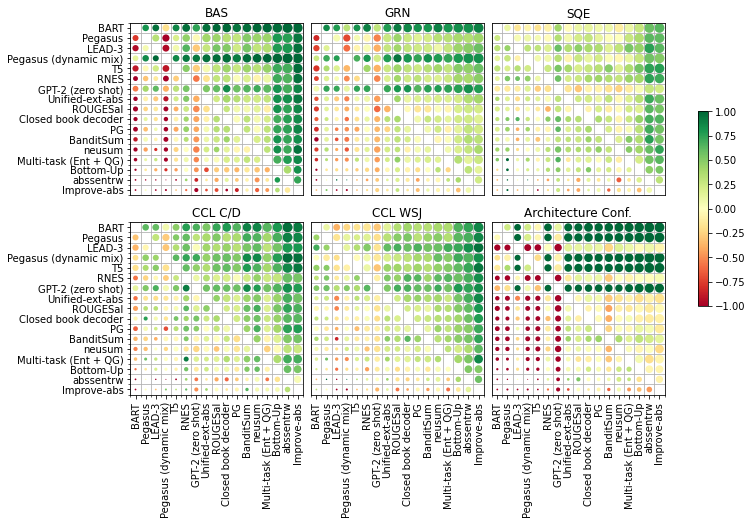

In [2]:
max_data = generate_architecture_data(read_gold_scores("data/sumeval_full_scores.csv", "Qcoherence"), None)
max_data = randomize_metric(max_data)
plot_measures_matrices([
    "BAS",
    "GRN",
    "SQE",
    "CCL C/D",
    "CCL WSJ", 
    (
        "Architecture Conf.",
        max_data
    )
])

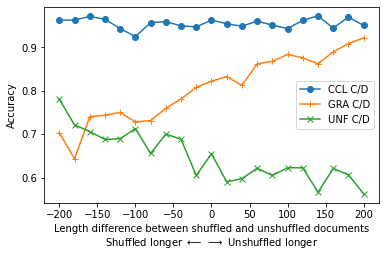

In [3]:
plot_measure_length_sensitivty(["CCL C/D", "GRA C/D", "UNF C/D"])
import matplotlib.pyplot as plt
plt.gcf().subplots_adjust(bottom=0.2)

plt.savefig("saved_plots/length_diff.png")

In [4]:
import pandas as pd
import itertools as it

summaries = pd.read_csv("data/sumeval_full_summaries.csv", index_col=["doc", "summarizer"])["summary"]
lengths = summaries.map(len)

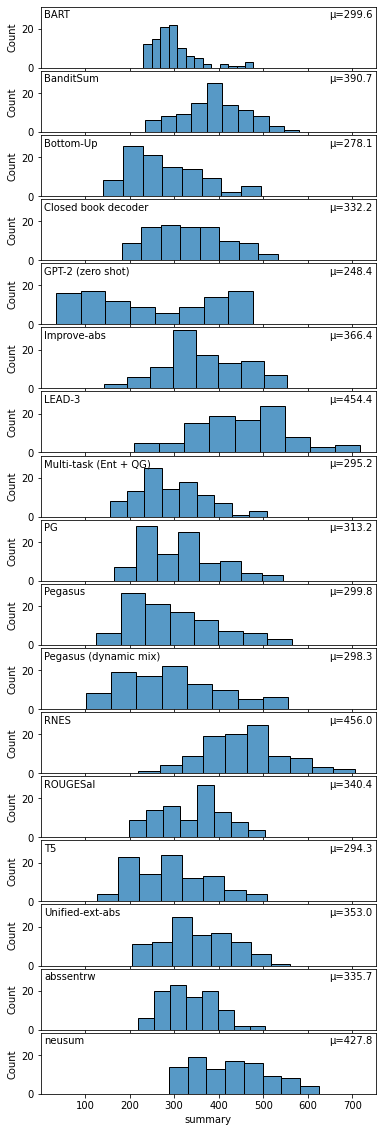

In [5]:
import seaborn as sbs

fig, axes = plt.subplots(len(lengths.index.unique("summarizer")), 1, sharey=True, sharex=True)

fig.set_size_inches(6.0, 20.0)
fig.subplots_adjust(wspace=0.05, hspace=0.05)

for ax, (name, length) in zip(axes, lengths.groupby("summarizer")):
    ax.text(0.01, 0.95, name,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
    
    ax.text(0.99, 0.95, f"μ={length.mean():.1f}",
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)

    sbs.histplot(length, ax=ax)

plt.savefig("saved_plots/lengths.png", bbox_inches='tight')